In [3133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,StandardScaler

In [3134]:
data = pd.read_csv('laptop_price.csv',encoding='unicode_escape')

In [3135]:
data.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [3136]:
data.duplicated().sum()

np.int64(0)

In [3137]:
data.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00


# Data Preprocessing

# Company

In [3138]:
data['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [3139]:
data = data.drop(columns=['Product'])

# TypeName

In [3140]:
data['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [3141]:
data['TypeName'] = data['TypeName'].str.replace('Netbook','Notebook')

In [3142]:
data['TypeName'].value_counts()

TypeName
Notebook              752
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Name: count, dtype: int64

# Screen Resolution

In [3143]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [3144]:
data['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [3145]:
data['ScreenResolution'] = data['ScreenResolution'].str.split(' ').str[-1]

In [3146]:
data['ScreenResolution']

0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

# Ram

In [3147]:
data['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [3148]:
data['Ram'] = data['Ram'].apply(lambda x:x[:-2]).astype(int)  # removing GB from ram

In [3149]:
data['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: int64

# Cpu

In [3150]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

# creating column cpu brand

In [3151]:
data['Cpu Brand'] = data['Cpu'].str.split(' ').str[0]

In [3152]:
data['Cpu Brand'].value_counts()

Cpu Brand
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [3153]:
data = data.drop(data[data['Cpu Brand']=='Samsung'].index)  # remove samsung row beacause it's count was 1

# creating column cpu HZ

In [3154]:
data['Cpu HZ'] = data['Cpu'].str.split(' ').str[-1]

In [3155]:
data['Cpu HZ'] = data['Cpu HZ'].apply(lambda x: x[:-3]).astype(float)

In [3156]:
data['Cpu HZ']

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu HZ, Length: 1302, dtype: float64

In [3157]:
data = data.drop(columns=['Cpu']) # drop cpu column

data

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Cpu Brand,Cpu HZ
0,1,Apple,Ultrabook,13.3,2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,Intel,2.3
1,2,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,Intel,1.8
2,3,HP,Notebook,15.6,1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0,Intel,2.5
3,4,Apple,Ultrabook,15.4,2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,Intel,2.7
4,5,Apple,Ultrabook,13.3,2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1,Intel,2.5
1299,1317,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1,Intel,2.5
1300,1318,Lenovo,Notebook,14.0,1366x768,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,0,Intel,1.6
1301,1319,HP,Notebook,15.6,1366x768,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,Intel,2.5


# Memory

In [3158]:
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [3159]:
def dd(x):
    y = ['.0','GB','SSD','HDD','Flash Storage','Hybrid']
    for i in range(len(y)):
        x = x.replace(y[i],'')
    x = x.replace('TB','000')
    x = x.split('+')
    if len(x) == 2:
        x=[int(i) for i in x]
        x = sum(x)
        return x
    else:
        x=[int(i) for i in x]
        x=sum(x)
        return x

In [3160]:
data['Memory']=data['Memory'].apply(dd).astype(int)


In [3161]:
data['Memory'].value_counts()

Memory
256     420
1000    247
500     132
512     122
1128     94
128      81
1256     74
32       44
2000     19
64       16
1512     15
2256     10
16       10
180       5
2512      3
756       2
2128      2
1024      1
768       1
1064      1
240       1
8         1
508       1
Name: count, dtype: int64

# Gpu

In [3162]:
data

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Cpu Brand,Cpu HZ
0,1,Apple,Ultrabook,13.3,2560x1600,8,128,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0,Intel,2.3
1,2,Apple,Ultrabook,13.3,1440x900,8,128,Intel HD Graphics 6000,macOS,1.34kg,898.94,0,Intel,1.8
2,3,HP,Notebook,15.6,1920x1080,8,256,Intel HD Graphics 620,No OS,1.86kg,575.00,0,Intel,2.5
3,4,Apple,Ultrabook,15.4,2880x1800,16,512,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0,Intel,2.7
4,5,Apple,Ultrabook,13.3,2560x1600,8,256,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,128,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1,Intel,2.5
1299,1317,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,512,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,1,Intel,2.5
1300,1318,Lenovo,Notebook,14.0,1366x768,2,64,Intel HD Graphics,Windows 10,1.5kg,229.00,0,Intel,1.6
1301,1319,HP,Notebook,15.6,1366x768,6,1000,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,0,Intel,2.5


In [3163]:
data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [3164]:
'''def gg(x):
    x = x.split(' ')
    x = x[0:2]
    x = x[0]+' '+x[1]
    return x'''

"def gg(x):\n    x = x.split(' ')\n    x = x[0:2]\n    x = x[0]+' '+x[1]\n    return x"

In [3165]:
data['Gpu'] = data['Gpu'].str.split(' ').str[0]

In [3166]:
data['Gpu']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu, Length: 1302, dtype: object

In [3167]:
data['Gpu'].value_counts()

Gpu
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

# OpSys

In [3168]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [3169]:
data['OpSys'] = data['OpSys'].replace('Mac OS X','macOS')
data['OpSys'] = data['OpSys'].replace('Windows 10 S','Windows 10')

In [3170]:
data = data.drop(data[data['OpSys']=='Android'].index)

In [3171]:
data

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Cpu Brand,Cpu HZ
0,1,Apple,Ultrabook,13.3,2560x1600,8,128,Intel,macOS,1.37kg,1339.69,0,Intel,2.3
1,2,Apple,Ultrabook,13.3,1440x900,8,128,Intel,macOS,1.34kg,898.94,0,Intel,1.8
2,3,HP,Notebook,15.6,1920x1080,8,256,Intel,No OS,1.86kg,575.00,0,Intel,2.5
3,4,Apple,Ultrabook,15.4,2880x1800,16,512,AMD,macOS,1.83kg,2537.45,0,Intel,2.7
4,5,Apple,Ultrabook,13.3,2560x1600,8,256,Intel,macOS,1.37kg,1803.60,0,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,128,Intel,Windows 10,1.8kg,638.00,1,Intel,2.5
1299,1317,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,512,Intel,Windows 10,1.3kg,1499.00,1,Intel,2.5
1300,1318,Lenovo,Notebook,14.0,1366x768,2,64,Intel,Windows 10,1.5kg,229.00,0,Intel,1.6
1301,1319,HP,Notebook,15.6,1366x768,6,1000,AMD,Windows 10,2.19kg,764.00,0,Intel,2.5


# Weight

In [3172]:
data['Weight'] = data['Weight'].apply(lambda x:x.replace('kg','')).astype(float)

In [3173]:
data

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Cpu Brand,Cpu HZ
0,1,Apple,Ultrabook,13.3,2560x1600,8,128,Intel,macOS,1.37,1339.69,0,Intel,2.3
1,2,Apple,Ultrabook,13.3,1440x900,8,128,Intel,macOS,1.34,898.94,0,Intel,1.8
2,3,HP,Notebook,15.6,1920x1080,8,256,Intel,No OS,1.86,575.00,0,Intel,2.5
3,4,Apple,Ultrabook,15.4,2880x1800,16,512,AMD,macOS,1.83,2537.45,0,Intel,2.7
4,5,Apple,Ultrabook,13.3,2560x1600,8,256,Intel,macOS,1.37,1803.60,0,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,128,Intel,Windows 10,1.80,638.00,1,Intel,2.5
1299,1317,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,512,Intel,Windows 10,1.30,1499.00,1,Intel,2.5
1300,1318,Lenovo,Notebook,14.0,1366x768,2,64,Intel,Windows 10,1.50,229.00,0,Intel,1.6
1301,1319,HP,Notebook,15.6,1366x768,6,1000,AMD,Windows 10,2.19,764.00,0,Intel,2.5


In [3174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1300 non-null   int64  
 1   Company           1300 non-null   object 
 2   TypeName          1300 non-null   object 
 3   Inches            1300 non-null   float64
 4   ScreenResolution  1300 non-null   object 
 5   Ram               1300 non-null   int64  
 6   Memory            1300 non-null   int64  
 7   Gpu               1300 non-null   object 
 8   OpSys             1300 non-null   object 
 9   Weight            1300 non-null   float64
 10  Price_euros       1300 non-null   float64
 11  Touchscreen       1300 non-null   int64  
 12  Cpu Brand         1300 non-null   object 
 13  Cpu HZ            1300 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 152.3+ KB


# Encoding

In [3175]:
lable = LabelEncoder()
data['Company'] = lable.fit_transform(data['Company'])
data['TypeName'] = lable.fit_transform(data['TypeName'])
data['ScreenResolution'] = lable.fit_transform(data['ScreenResolution'])
data['Gpu'] = lable.fit_transform(data['Gpu'])
data['OpSys'] = lable.fit_transform(data['OpSys'])
data['Cpu Brand'] = lable.fit_transform(data['Cpu Brand'])

In [3176]:
data

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Cpu Brand,Cpu HZ
0,1,1,3,13.3,10,8,128,1,5,1.37,1339.69,0,1,2.3
1,2,1,3,13.3,1,8,128,1,5,1.34,898.94,0,1,1.8
2,3,7,2,15.6,3,8,256,1,2,1.86,575.00,0,1,2.5
3,4,1,3,15.4,12,16,512,0,5,1.83,2537.45,0,1,2.7
4,5,1,3,13.3,10,8,256,1,5,1.37,1803.60,0,1,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,10,0,14.0,3,4,128,1,3,1.80,638.00,1,1,2.5
1299,1317,10,0,13.3,13,16,512,1,3,1.30,1499.00,1,1,2.5
1300,1318,10,2,14.0,0,2,64,1,3,1.50,229.00,0,1,1.6
1301,1319,7,2,15.6,0,6,1000,0,3,2.19,764.00,0,1,2.5


# Removing Outliers

<Axes: xlabel='Price_euros'>

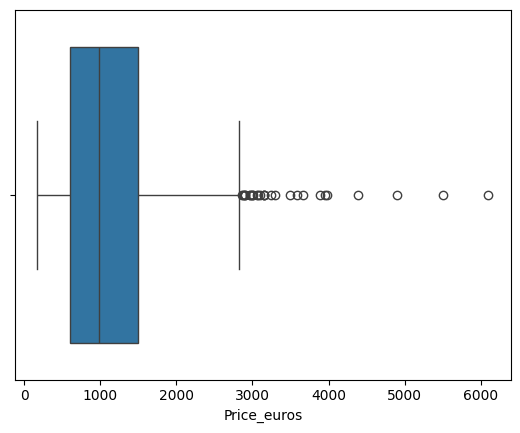

In [3177]:
import seaborn as sns
sns.boxplot(data=data,x='Price_euros')

In [3178]:
Q1 = data['Price_euros'].quantile(0.25)
Q3 = data['Price_euros'].quantile(0.75)
IQR = Q3 - Q1

In [3179]:
min_range = Q1 - 1.5*IQR
Max_range = Q3 + 1.5*IQR

In [3180]:
data = data[data['Price_euros']<=Max_range] 

In [3181]:
data.shape

(1272, 14)

<Axes: xlabel='Price_euros'>

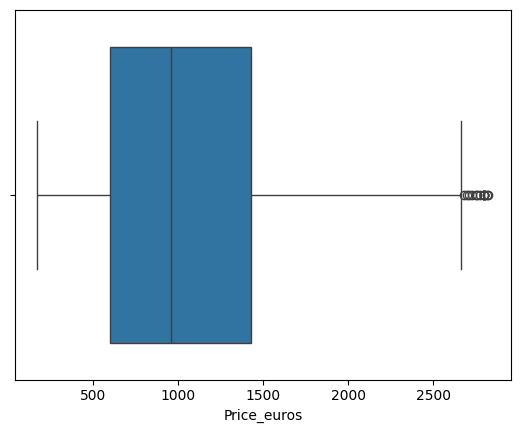

In [3182]:
sns.boxplot(data=data,x='Price_euros')  

# Data Spliting

In [3183]:
X = data.drop(columns=['laptop_ID','Price_euros'])
y = data['Price_euros']

In [3184]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

# Model Training

In [3185]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

# Model Evauation

In [3186]:
Y_pred = model.predict(X_test)
Y_pred

array([ 837.66215209, 1205.37401504,  494.40119212, 1663.25187157,
        823.68481181, 1440.87103735,  723.87116996, 1806.79778949,
       1307.32744824,  782.18939387, 1065.84205257, 2140.20511089,
       1087.96616129, -113.4191503 ,  675.11314056, 1671.69322099,
        957.28278007, 1266.44389881,  950.78017237,  371.65346802,
       1086.91893267, 2010.7724276 , 1327.8257058 ,  782.07022524,
       1285.90552974, 1029.65187709,  605.35456683,  755.88643108,
       1249.08322389, 2339.89598468,  630.9912245 , 1643.91754886,
        573.24518901,  195.23107272, 1123.01140351, 2032.79210573,
       1135.3538995 ,  737.36938414, 1564.24137903,  560.61121858,
        480.02951725, 1039.95898911, 1385.70369253,  439.69506778,
       1212.30838074, 1881.92293049,  689.14786969,  682.49666211,
       1155.12986236, 1481.09468782,  700.27926295,  636.58755969,
       1169.21677931, 1746.70864546,  961.55968248, 1673.03899869,
       1267.23798213,  769.11418119,  771.75548424, 2248.62022

In [3187]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 242.57
mean_squared_error : 100769.94
r2_score : 0.71
